In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage
import yaml
from pyevtk.hl import imageToVTK 
from skimage import io
from scipy.ndimage import gaussian_filter
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops

# read parameters

In [2]:
with open("../base/parameters.yml") as file:
    parameters = yaml.load(file, Loader=yaml.FullLoader)
with open("../local/parameters.yml") as file:
    parameters_local = yaml.load(file, Loader=yaml.FullLoader)

# overwrite global parameters with local setting
for key in parameters_local:
    parameters[key] = parameters_local[key]
    
print(parameters)

{'data_folder': '/home/ebauman/Data/zebrafish_xenograft/', 'output_folder': '/home/ebauman/Data/zebrafish_xenograft/'}


# specify and read tiff images

In [19]:
data_folder = parameters["data_folder"]
subfolder = "03_Processed_Data/3D/"

filename = "200818_LBT001_1dpi_Pos001.tif.tiff"
filename_short = "200818_LBT001_1dpi_Pos001"

image = np.array(io.imread(data_folder + subfolder + filename))


#filename_short = "200811_Pos002"
#macrophage_file = "200811 mpeg-mCherry x kdrl-lynEYFP LBT123 1in27 GFP 2dpf 1dpi Ti30min_Mark_and_Find003_Position002_macrophages3D.tif"
#im_macrophages = np.array(io.imread(data_folder + macrophage_file))
#tumor_file = "200811 mpeg-mCherry x kdrl-lynEYFP LBT123 1in27 GFP 2dpf 1dpi Ti30min_Mark_and_Find003_Position002_tumor3D.tif"
#im_tumor = np.array(io.imread(data_folder + tumor_file))
#vessel_file = "200811 mpeg-mCherry x kdrl-lynEYFP LBT123 1in27 GFP 2dpf 1dpi Ti30min_Mark_and_Find003_Position002_vessels3D.tif"
#im_vessel = np.array(io.imread(data_folder + vessel_file))
#im_vessel.shape

In [20]:
print(image.shape)
im_tumor = image[:,:,:,:,0]
im_macrophages = image[:,:,:,:,1]
im_vessel = image[:,:,:,:,2]

(19, 127, 1024, 1024, 3)


# smooth images

In [21]:
sigma0 = 5
im_macrophage_smoothed = gaussian_filter(im_macrophages[0,:,:,:], sigma = sigma0)
im_tumor_smoothed = gaussian_filter(im_tumor[0,:,:,:], sigma = sigma0)
im_vessel_smoothed = gaussian_filter(im_vessel[0,:,:,:], sigma = sigma0)

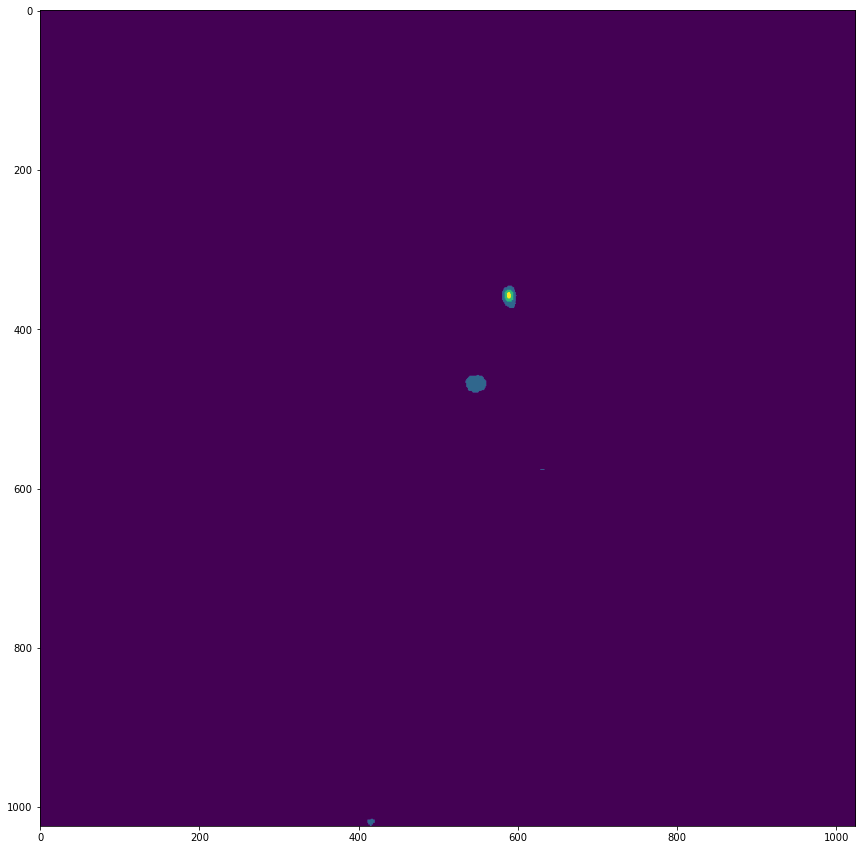

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(im_macrophage_smoothed[50,:,:])

# save time series

In [23]:
sigma0 = 3
output_folder = parameters["output_folder"] + "/03_Processed_Data/paraview_out/"

for frame in range(0,im_vessel.shape[0]):
    print(str(frame).zfill(3))    
    
    im_macrophages_smoothed = gaussian_filter(im_macrophages[frame,:,:,:], sigma = sigma0)
    im_tumor_smoothed = gaussian_filter(im_tumor[frame,:,:,:], sigma = sigma0)    
    im_vessel_smoothed = gaussian_filter(im_vessel[frame,:,:,:], sigma = sigma0)    
        
    time_stamp = str(frame).zfill(3)
    filename = output_folder + filename_short + "-" + time_stamp
    
    imageToVTK(filename, cellData = {"tumor": im_tumor_smoothed, 
                                     "macrophages" : im_macrophages_smoothed, 
                                     "vessel": im_vessel_smoothed})

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
